In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import random

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Upay/Final.csv")
df = df.sample(frac=1, random_state=42)
df = df.reset_index(drop= True)

In [4]:
df.head(5)

,Wallet No,Address,Balance,Age,Occupation,Loan Approval,Balance Deviation (CV),Send Money_1,Send Money_2,Send Money_3,...,Fund Transfer_2,Fund Transfer_3,Request Money,Remittance_1,Remittance_2,Donation_1,Donation_2,Others_1,Others_2,Others_3
0,1916633981,Rural,22126.24,41,Business,UC,46.92,3,10,0,...,0,1,2,0,0,0,2,1,2,0
1,1803010246,Rural,7349.05,77,Lawyer,Eligible,36.50,10,5,0,...,2,1,2,1,0,0,5,1,2,0
2,1174172954,Urban,241.66,32,Farmer,Not Eligible,52.52,10,2,0,...,1,0,10,0,0,0,1,0,4,1
3,1699930717,Rural,20692.12,36,Govt. Service,Eligible,24.88,1,2,4,...,4,5,2,0,2,0,1,2,0,0
4,1871835885,Urban,19814.02,33,Business,UC,65.32,3,1,0,...,0,1,0,1,0,1,3,0,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36013 entries, 0 to 36012
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wallet No               36013 non-null  int64  
 1   Address                 36013 non-null  object 
 2   Balance                 36013 non-null  float64
 3   Age                     36013 non-null  int64  
 4   Occupation              36013 non-null  object 
 5   Loan Approval           36013 non-null  object 
 6   Balance Deviation (CV)  36013 non-null  float64
 7   Send Money_1            36013 non-null  int64  
 8   Send Money_2            36013 non-null  int64  
 9   Send Money_3            36013 non-null  int64  
 10  Received Money_1        36013 non-null  int64  
 11  Received Money_2        36013 non-null  int64  
 12  Received Money_3        36013 non-null  int64  
 13  Cash In_1               36013 non-null  int64  
 14  Cash In_2               36013 non-null

In [6]:
from sklearn.preprocessing import LabelEncoder
loan_encode = LabelEncoder()

In [7]:
df["Address"].unique()

array(['Rural', 'Urban'], dtype=object)

In [8]:
df['Address'] = loan_encode.fit_transform(df['Address'])
df["Address"].unique()

array([0, 1])

In [9]:
df["Occupation"].unique()

array(['Business', 'Lawyer', 'Farmer', 'Govt. Service', 'Private Service',
       'NGO', 'Student', 'Engineer', 'House Wife', 'Doctor'], dtype=object)

In [10]:
df['Occupation'] = loan_encode.fit_transform(df['Occupation'])
df["Occupation"].unique()

array([0, 6, 3, 4, 8, 7, 9, 2, 5, 1])

In [11]:
df["Loan Approval"].unique()

array(['UC', 'Eligible', 'Not Eligible'], dtype=object)

In [12]:
df['Loan Approval'] = loan_encode.fit_transform(df['Loan Approval'])
df["Loan Approval"].unique()

array([2, 0, 1])

In [13]:
columns_to_drop = ["Loan Approval", "Wallet No"]
X = df.drop(columns = columns_to_drop, axis=1)
y = df["Loan Approval"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model with the Adam optimizer.
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Fit the model to the training data.
logistic_regression_model.fit(X_train, y_train)

# Calculate the training accuracy.
train_accuracy = logistic_regression_model.score(X_train, y_train)

# Print the training accuracy.
print('Training accuracy:', train_accuracy)

Training accuracy: 0.9506768483165567


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
import pickle
with open('/content/drive/MyDrive/Upay/Upay_Loan_System_model.pkl', 'wb') as f:
  pickle.dump(logistic_regression_model, f)

In [17]:
logistic_regression_pred = logistic_regression_model.predict(X_test)

In [18]:
# Evaluate Logistic Regression model
accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_pred))

Logistic Regression Accuracy: 0.9507149798694988
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3576
           1       0.91      0.94      0.93      1631
           2       0.92      0.90      0.91      1996

    accuracy                           0.95      7203
   macro avg       0.94      0.94      0.94      7203
weighted avg       0.95      0.95      0.95      7203



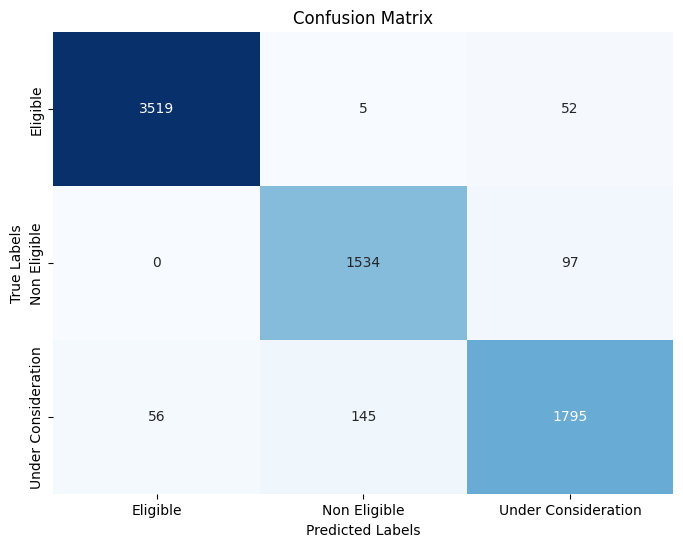

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))

# Replace the labels in the confusion matrix
labels = ["Eligible", "Non Eligible", "Under Consideration"]
cm = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the heatmap
plt.show()

In [22]:
unknown_data_instance = [1, 1000, 45, 5, 64.2176,2,0,0,3,1,0,1,1,0,4,0,0,1,0,0,2,0,1,0,0,1,0,0,2,3,0,1,0,1,0,0]

In [23]:
unknown_data_instance = [unknown_data_instance]

In [24]:
# Get probability predictions for each class
probability_predictions = logistic_regression_model.predict_proba(unknown_data_instance)

# Convert the probability predictions to a percentage format
percentage_predictions = [f"{prob * 100:.2f}%" for prob in probability_predictions[0]]

# Print the percentage predictions for each class
class_labels = logistic_regression_model.classes_
for label, percentage in zip(class_labels, percentage_predictions):
    print(f"{label}: {percentage}")

0: 0.06%
1: 98.85%
2: 1.09%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
